# BISI CST2101 Project -  Used Car Price Prediction

#### Yanhui Gao    -- gao00126

---------------
## Context
---------------
Second hand's car have a huge market base. Many consider to buy a Used Car intsead of buying of new one, as it's is feasible and a better investment. We will try to develop a statistical model which will be able to predict the price of a used car, based on previous consumer data and a given set of features. We will also be comparing the prediction accuracy of these models to determine the optimal one.

---------------
## Objective
---------------

Here, we are build some models to predict the used car price.

-------------------------
## Data Dictionary
-------------------------

This dataset contains information about used cars listed on www.cardekho.com .This data can be used for a lot of purposes such as price prediction using Machine Learning. The columns in the given dataset is as follows:

* Car_Name
* Year
* Selling_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

---------------
### This project will be carried out in 4 stages
---------------

1. Exploratory Data Analysis: Data understanding and generating insights
2. Data Cleaning & Data Preparation: Preparing data for Modelling
3. Data Modelling: Experimenting with different algorithms
4. Model Evaluation: Evaluate using performance metrics

## 1. Exploratory Data Analysis 

Our goal with this is to **"get to know"** the data. We will probably need to do ad-hoc data exploration later. 

#### Import the libraries we need.

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for Data Manipulation
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

#### Import the dataset

In [2]:
# Load real estate data from the CSV file
df = pd.read_csv('CAR DETAILS FROM CAR Dealer.csv')

#### Display the dataset basic information

In [3]:
# print the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Automatic,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Automatic,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Automatic,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Automatic,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Automatic,Second Owner


#### Check if corrupted data hiding at the very end 

In [4]:
# Display the last 5 rows of data.
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Automatic,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Automatic,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Automatic,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Automatic,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Automatic,First Owner


#### Look at the shape, or the dimensions of the dataset

In [5]:
# Dataframe dimensions
df.shape

(4340, 8)

#### Display the data types

In [6]:
# Print column datatypes using .dtypes
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [7]:
#missing values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

## Distributions

#### Seaborn comes with a .pairplot() function that plots the distributions of all of the numeric features

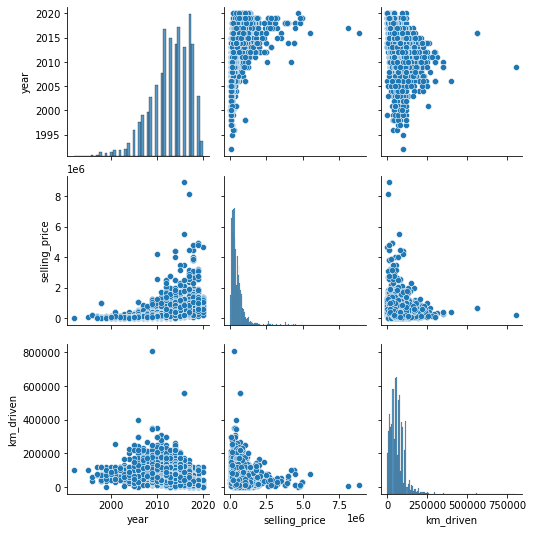

In [8]:
# Plot histogram grid
sns.pairplot(df)

# Clear the text "residue"
plt.show()

#### Display summary statistics for the numerical features

In [9]:
# Summarize numerical features
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Look at the distributions of categorical features

In [10]:
# Summarize categorical features
df.describe(include=['object'])

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Automatic,First Owner
freq,69,2153,3244,3892,2832


## Data Preprocessing

In [11]:
# Create a used car age feature
df['Age'] = 2022 - df['year']
df.drop('year',axis=1,inplace = True)

In [12]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,Maruti 800 AC,60000,70000,Petrol,Individual,Automatic,First Owner,15
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Automatic,First Owner,15
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Automatic,First Owner,10
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Automatic,First Owner,5
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Automatic,Second Owner,8


In [13]:
# checking the distribution of categorical data
print(df.fuel.value_counts())
print()
print(df.seller_type.value_counts())
print()
print(df.transmission.value_counts())
print()
print(df.owner.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

Automatic    3892
Manual        448
Name: transmission, dtype: int64

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


####  Plot bar plots of each of the categorical features

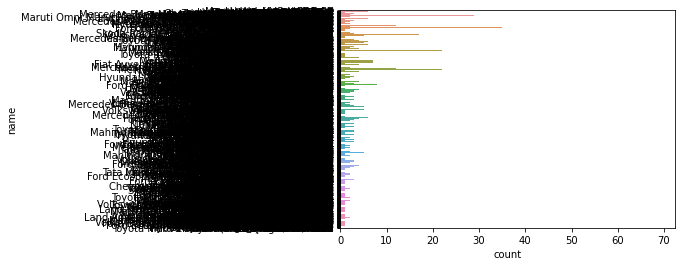

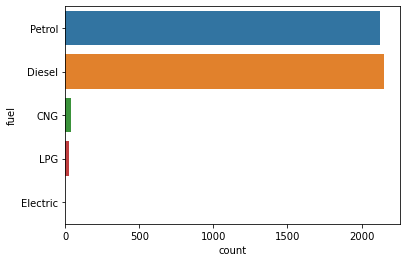

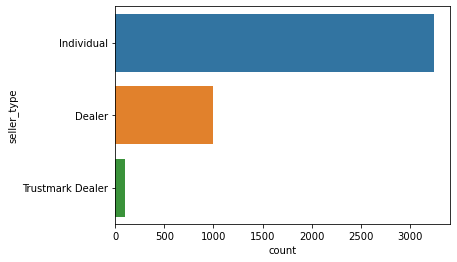

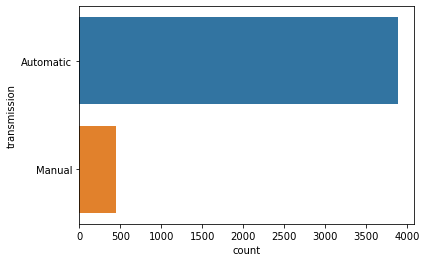

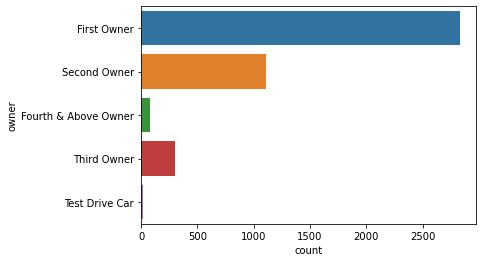

In [14]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

#### Calculating correlation

In [15]:
# Calculate correlations between numeric features
matrix = df.corr()
matrix

,selling_price,km_driven,Age
selling_price,1.000000,-0.192289,-0.413922
km_driven,-0.192289,1.000000,0.419688
Age,-0.413922,0.419688,1.000000


#### Visualize the correlation grid 

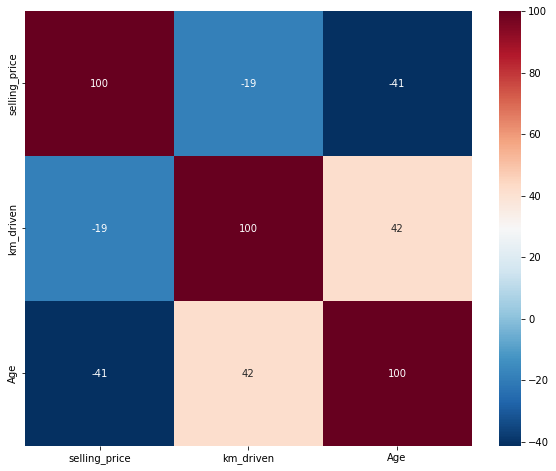

In [16]:
# Make the figsize 10 x 8,so that the plot is a bit larger 
plt.figure(figsize=(10,8))

# Plot heatmap of annotated correlations
sns.heatmap(matrix * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f')

plt.show()

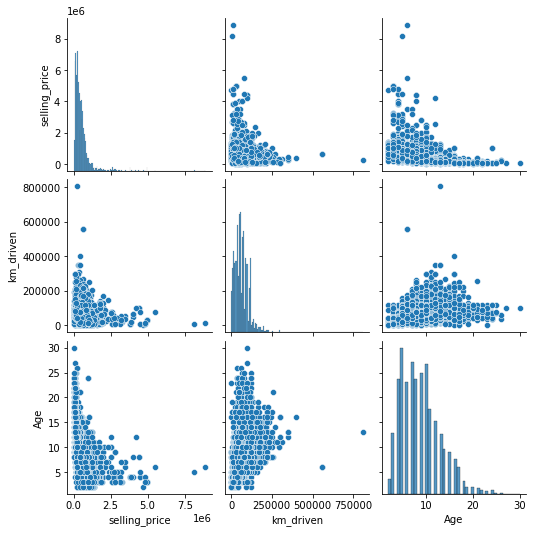

In [17]:
# Plot histogram grid
sns.pairplot(df)

# Clear the text "residue"
plt.show()

## 2. Data Cleaning

#### Drop unwanted observations

In [18]:
# check the shape of the data before
print(df.shape)

# Drop duplicates
# df = df.drop_duplicates()
# print(df.shape)

(4340, 8)


#### Fix structural errors

In [19]:
# N/A no null

In [20]:
df.Age

0       15
1       15
2       10
3        5
4        8
        ..
4335     8
4336     8
4337    13
4338     6
4339     6
Name: Age, Length: 4340, dtype: int64

#### Remove "Guilty" Outliers

In [21]:
import warnings
warnings.filterwarnings('ignore')

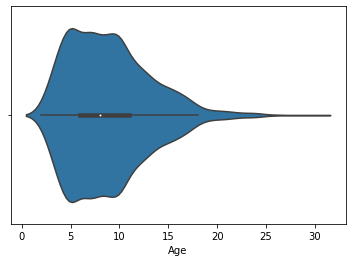

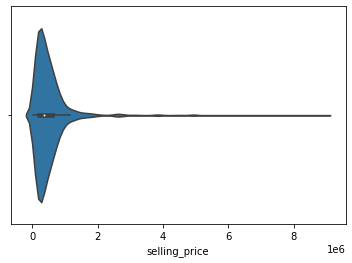

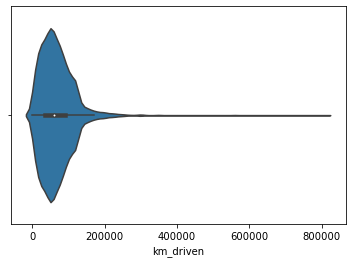

In [22]:
# Violin plot of Age
sns.violinplot(df.Age, data=df)
plt.show()

# Violin plot of selling_price
sns.violinplot(df.selling_price, data=df)
plt.show()

# Violin plot of km_driven
sns.violinplot(df.km_driven, data=df)
plt.show()

In [23]:
# Print top 5 cars with largest age
df.km_driven.sort_values(ascending=False).head(10)

1243    806599
4184    560000
525     560000
3679    400000
2394    350000
69      350000
3718    347089
1674    312000
1659    300000
3898    300000
Name: km_driven, dtype: int64

In [24]:
# print the record where km_driven = 806599
df[df.km_driven == 806599]

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
1243,Maruti Swift VXI BSIII,250000,806599,Petrol,Dealer,Automatic,First Owner,13


In [25]:
# All of the other observations are below 500,000 km, let's remove outliers
print(df.shape)

(4340, 8)


In [26]:
# Remove records with km_driven > 400,000
df = df[df.km_driven <= 400000]

# check df shape after
print(df.shape)

(4337, 8)


#### Save the cleaned dataset

In [27]:
# Save the cleaned dataset
df.to_csv('used_car_cleaned_df.csv')

## 3. Feature Engineering

In [28]:
# Load cleaned dataset from the previous lecture
df = pd.read_csv('used_car_cleaned_df.csv')
df.head(2)

,Unnamed: 0,name,selling_price,km_driven,fuel,seller_type,transmission,owner,Age
0,0,Maruti 800 AC,60000,70000,Petrol,Individual,Automatic,First Owner,15
1,1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Automatic,First Owner,15


### Group sparse classes

In [29]:
# Replace/Group CNG, LPG, Electric to 'Other'
df.fuel.replace(['CNG', 'LPG','Electric'], 'Other', inplace=True)

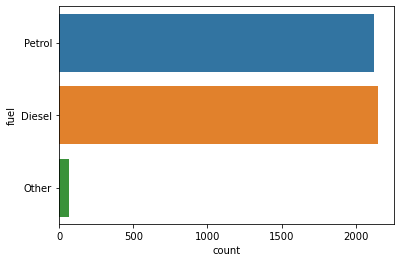

In [30]:
sns.countplot(y='fuel', data=df)
plt.show()

#### Encoding the Categorical Columns

In [31]:
# Create dummy variables for 'fuel', 'seller_type', 'transmission', 'owner'
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])

In [32]:
df.head()

,Unnamed: 0,name,selling_price,km_driven,Age,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,Maruti 800 AC,60000,70000,15,0,0,1,0,1,0,1,0,1,0,0,0,0
1,1,Maruti Wagon R LXI Minor,135000,50000,15,0,0,1,0,1,0,1,0,1,0,0,0,0
2,2,Hyundai Verna 1.6 SX,600000,100000,10,1,0,0,0,1,0,1,0,1,0,0,0,0
3,3,Datsun RediGO T Option,250000,46000,5,0,0,1,0,1,0,1,0,1,0,0,0,0
4,4,Honda Amaze VX i-DTEC,450000,141000,8,1,0,0,0,1,0,1,0,0,0,1,0,0


#### Save this dataset and train the model on it.

In [33]:
# Save the data as 'final.csv'
df.to_csv('used_car_final.csv', index=None)

## 4. Model Training

In [34]:
# Load the data
df = pd.read_csv('used_car_final.csv')
df.head()

,Unnamed: 0,name,selling_price,km_driven,Age,fuel_Diesel,fuel_Other,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,Maruti 800 AC,60000,70000,15,0,0,1,0,1,0,1,0,1,0,0,0,0
1,1,Maruti Wagon R LXI Minor,135000,50000,15,0,0,1,0,1,0,1,0,1,0,0,0,0
2,2,Hyundai Verna 1.6 SX,600000,100000,10,1,0,0,0,1,0,1,0,1,0,0,0,0
3,3,Datsun RediGO T Option,250000,46000,5,0,0,1,0,1,0,1,0,1,0,0,0,0
4,4,Honda Amaze VX i-DTEC,450000,141000,8,1,0,0,0,1,0,1,0,0,0,1,0,0


In [35]:
df.shape

(4337, 18)

### Train test split

In [36]:
# seperate input features in x
x = df.drop(['name', 'selling_price'], axis=1)

# store the target variable in y
y = df['selling_price']
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4332    409999
4333    409999
4334    110000
4335    865000
4336    225000
Name: selling_price, Length: 4337, dtype: int64

In [37]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3469, 16), (3469,), (868, 16), (868,))

### 1. Linear Regression Model

In [39]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [40]:
# train the model
lrmodel = LinearRegression().fit(x_train,y_train)

# make preditions on train set
ytrain_pred = lrmodel.predict(x_train)

In [41]:
# evaluate the model, we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(ytrain_pred, y_train)
print('Train error is', train_mae)

Train error is 227965.68518027713


In [42]:
# make predictions om test set
test_pred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(test_pred, y_test)
print('Test error is', test_mae)

Test error is 236407.79628311537


### 2. Decision Tree Model

In [43]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [44]:
# train the model
dtmodel = DecisionTreeRegressor(max_depth=4, min_samples_split=30).fit(x_train,y_train)

In [45]:
# make prediction on train set
ytrain_pred = dtmodel.predict(x_train)

In [46]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

184773.87225363098

In [47]:
# make predictions using the x_test values
ytest_pred = dtmodel.predict(x_test)

In [48]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

198362.6577256138

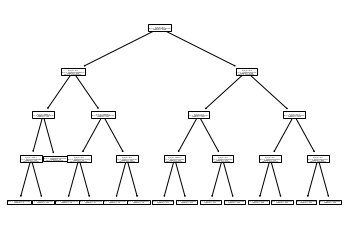

In [49]:
# plot the tree
from sklearn import tree
tree.plot_tree(dtmodel)
plt.show()

### 3. Random Forest Model

In [50]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor


In [51]:
# train the model
# del model
rfmodel = RandomForestRegressor(n_estimators=200, criterion='mae',min_samples_leaf=50, random_state=0).fit(x_train,y_train)

In [52]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [53]:
# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

176124.04441265497

In [54]:
# make predictions using the x_test values
ytest_pred = rfmodel.predict(x_test)

In [55]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

177859.5280731567

### 4. Support Vector Machines

In [56]:
# import Support Vector Machines model
from sklearn import svm

In [57]:
# train the model
# del model
svmodel = svm.SVC(kernel='poly', degree=2).fit(x_train, y_train)

In [58]:
# make prediction on train set
ytrain_pred = svmodel.predict(x_train)

In [59]:
# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

307464.14009801095

In [60]:
# make predictions using the x_test values
ytest_pred = svmodel.predict(x_test)

In [61]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

299928.80069124425

### Mean Absolute Error of Random Forest model on the train  < 180000

### Find most important features for prediction

In [62]:
# Gives us better interpretability of data
importances=list(rfmodel.feature_importances_)
indices = np.argsort(importances)[::-1]
feat_labels = df.columns[1:]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) km_driven                      0.573367
 2) Age                            0.141608
 3) transmission_Automatic         0.087111
 4) seller_type_Trustmark Dealer   0.069813
 5) selling_price                  0.062146
 6) fuel_Other                     0.043083
 7) name                           0.009740
 8) seller_type_Dealer             0.009068
 9) fuel_Petrol                    0.003266
10) transmission_Manual            0.000565
11) owner_Fourth & Above Owner     0.000233
12) owner_Test Drive Car           0.000000
13) owner_Second Owner             0.000000
14) owner_First Owner              0.000000
15) seller_type_Individual         0.000000
16) fuel_Diesel                    0.000000
